Load location

In [34]:
import pandas as pd
import os
import matplotlib as plt
from datetime import datetime
def time_pars(c):
    return datetime(int(c[6:10]), int(c[3:5]), int(c[0:2]), int(c[11:13]), int(c[14:16]), int(c[17:19]))
loc = input('Files location: ')

Files location: ../metadata


Select file

In [47]:
files_list = os.listdir(loc)
for i in range(len(files_list)):
    print(i + 1, files_list[i], sep=': ')
sel = int(input('Select file:')) - 1
with open(os.path.join(loc, files_list[sel]), 'r') as file:
    data = pd.read_csv(file, parse_dates=[0], date_parser=time_pars, index_col=0)
data = data[data['Binary changed'] == True]
data = data.filter(items=[])
data.insert(column='Quantity', value=1, loc=0)

1: VehiclePositions_T.pb.csv
2: ServiceAlerts_A.pb.csv
3: TripUpdates_A.pb.csv
4: GTFS_KRK_A.zip.csv
5: ServiceAlerts_T.pb.csv
6: GTFS_KRK_T.zip.csv
7: VehiclePositions_A.pb.csv
8: TripUpdates_T.pb.csv
Select file:7


Select resample time delta and plot

Select time period:20T


<AxesSubplot:xlabel='Log time'>

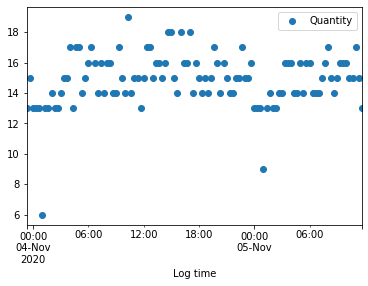

In [56]:
fr = input('Select time period:')
to_plot = data.resample(fr).sum()
to_plot.plot(style='o')